In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the csv file and converting into dataframe
x_train = pd.read_csv('X_train_update.csv', ',') 
y_train = pd.read_csv('Y_train_CVw08PX.csv', ',')
x_test = pd.read_csv('X_test_update.csv', ',')

In [3]:
#Dropping the unwanted columns
x_train = x_train.drop(['description','imageid', 'productid'], axis = 1)
x_test = x_test.drop(['description','imageid', 'productid'], axis = 1)

In [4]:
x_train

,Unnamed: 0,designation
0,0,Olivia: Personalisiertes Notizbuch / 150 Seite...
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...
3,3,Peluche Donald - Europe - Disneyland 2000 (Mar...
4,4,La Guerre Des Tuques
...,...,...
84911,84911,The Sims [ Import Anglais ]
84912,84912,Kit piscine acier NEVADA déco pierre Ø 3.50m x...
84913,84913,Journal Officiel De La Republique Francaise N°...
84914,84914,Table Basse Bois De Récupération Massif Base B...


In [5]:
y_train

,Unnamed: 0,prdtypecode
0,0,10
1,1,2280
2,2,50
3,3,1280
4,4,2705
...,...,...
84911,84911,40
84912,84912,2583
84913,84913,2280
84914,84914,1560


In [6]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
#labels in the train data
labels = list(y_train.prdtypecode.unique())
labels.sort()
print(len(labels))
print(len(set(labels)))

27
27


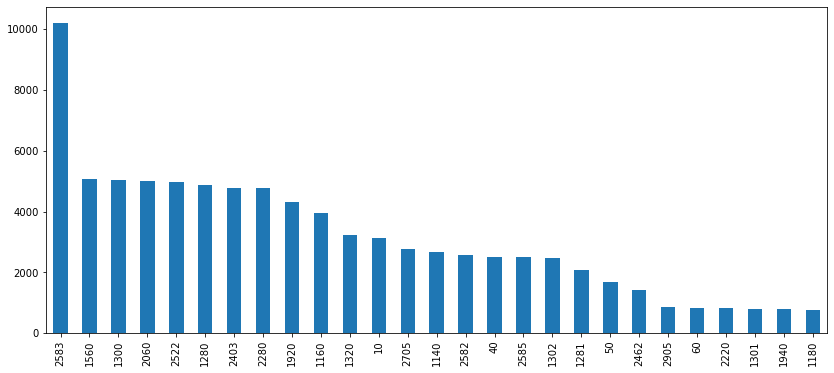

In [8]:
#distribution of labels in train data
plt.figure(figsize=(14,6))
y_train.prdtypecode.value_counts().plot(kind='bar')
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Converting the train data to TF-IDF
v = TfidfVectorizer()

X_train_counts = v.fit_transform(x_train['designation'])
X_train_counts.shape

(84916, 83370)

In [10]:
# Converting the test data to TF-IDF
X_test_counts = v.transform(x_test['designation'])
X_test_counts.shape

(13812, 83370)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import svm
#splitting the train data into train and validation data in 60-40 percent
X_train, X_val, Y_train, Y_val = train_test_split(
        X_train_counts, y_train['prdtypecode'], test_size=0.4, random_state=0)

k = X_train.shape, Y_train.shape
k1 = X_val.shape, Y_val.shape
print(k, k1)


((50949, 83370), (50949,)) ((33967, 83370), (33967,))


In [25]:
from xgboost import XGBClassifier

# XGBoost 
clf = XGBClassifier().fit(X_train, Y_train)
pred_XG = clf.predict(X_val)
f1_score(Y_val, pred_XG, average='macro')

0.7556839173655028

In [26]:
from sklearn.ensemble import RandomForestClassifier

#RandomForest
rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_val)
f1_score(Y_val, pred_rfc, average='macro')

0.7577803266624621

In [28]:
from sklearn.tree import DecisionTreeClassifier

#DecisionTree
dtc = DecisionTreeClassifier(random_state=0).fit(X_train,Y_train)
pred_dtc = dtc.predict(X_val)
f1_score(Y_val, pred_dtc, average='macro')

0.664940649950354

In [35]:
from sklearn.ensemble import AdaBoostClassifier

#AdaBoost
acf = AdaBoostClassifier(n_estimators=100).fit(X_train, Y_train)
pred_acf = acf.predict(X_val)
f1_score(Y_val, pred_acf, average='macro')

0.11789506563970875

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

#GradientBoosting
gb_clf = GradientBoostingClassifier(n_estimators=10).fit(X_train, Y_train)
pred_gb = gb_clf.predict(X_val)
f1_score(Y_val, pred_gb, average='macro')

0.6190135818630474

In [11]:
from xgboost import XGBClassifier

# XGBoost on test data
clf_test = XGBClassifier().fit(X_train_counts, y_train['prdtypecode'])
pred_XG_test = clf_test.predict(X_test_counts)

In [39]:
# Storing all the predictions in a dataframe
d = {'XGB': pred_XG, 'RandomForest': pred_rfc, 'DecisionTree': pred_dtc, 'AdaBoost': pred_acf, 'Grad_Boost': pred_gb}
df = pd.DataFrame(data=d)

In [40]:
# Converting the dataframe into csv file
df.to_csv('Train_val.csv', index = True, header=True)

In [12]:
#Creating a dataframe to store the predictions of test data
df2 = pd.DataFrame(pred_XG_test, columns=['XGBoost'])

In [13]:
from sklearn.tree import RandomForestClassifier

# Random forest classifier on test data
rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None)
rfc.fit(X_train_counts, y_train['prdtypecode'])
pred_rfc = rfc.predict(X_test_counts)

In [14]:
#Adding the random forest predictions to dataframe
df2['RandomForest'] = pred_rfc

In [15]:
from sklearn.tree import ExtraTreeClassifier

# ExtraTree 
brk = ExtraTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0).fit(X_train_counts, y_train['prdtypecode'])
pred_ETC = brk.predict(X_test_counts)

In [16]:
# Adding extratree predictions to dataframe
df2['ExtraTree'] = pred_ETC

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb_clf_test = GradientBoostingClassifier(n_estimators=10).fit(X_train_counts, y_train['prdtypecode'])
pred_gb_test = gb_clf_test.predict(X_test_counts)

In [19]:
# Adding predictions to dataframe
df2['GradientBoost'] = pred_gb_test

In [20]:
#COnverting the dataframe to csv file
df2.to_csv('Test.csv', index = True, header=True)